In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# reading the data set

In [72]:
data=pd.read_excel("iris (1).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [75]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [76]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [77]:
data['SL']=data['SL'].fillna(data['SL'].mean())

In [78]:
data['SW']=data['SW'].fillna(data['SW'].mean())

In [79]:
data['PL']=data['PL'].fillna(data['PL'].mean())

In [80]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [82]:
data.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [87]:
X = data.drop(['Classification'], axis=1)
y = data['Classification']

In [88]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


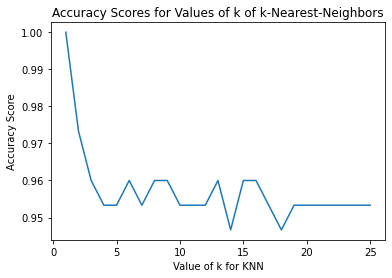

In [110]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [111]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9533333333333334


C:\Users\NIJU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


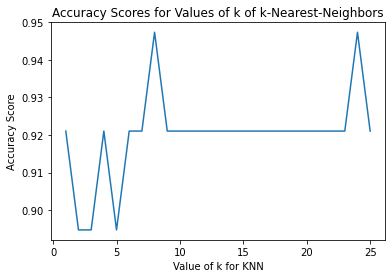

In [115]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [116]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


C:\Users\NIJU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Choosing K=8

In [121]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X, y)
# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])



array(['Iris-versicolor'], dtype=object)

# RandomForestClassifier

Iris-versicolor classification model gives the best result to predict iris
species.

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()
rf1.fit(X_train,y_train)

RandomForestClassifier()

In [127]:
y_pred = rf1.predict(X_test)

In [128]:
from sklearn.metrics import f1_score,confusion_matrix
print('f1_score is:',f1_score(y_test,y_pred,average='weighted'))
print('confusion_matrix:',confusion_matrix(y_test.values.argmax(axis=1),y_pred.argmax(axis=1)))

f1_score is: 0.9206975459638602


AxisError: axis 1 is out of bounds for array of dimension 1

In [130]:
pd.Series(rf1.feature_importances_,index=X.columns).sort_values(ascending = False)*100

PW    53.071864
PL    34.402053
SL     9.383687
SW     3.142396
dtype: float64

In [132]:
rf1.fit(X_train,y_train)

RandomForestClassifier()

In [134]:
rfit1= RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion="entropy")
rfit1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [136]:
y_pred=rfit1.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.9206975459638602